In [29]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

def get_scores_MSE(X, Y):
    Y -= Y.mean()
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)
    y_pred = clf.predict(X)
    MSE = ((Y - y_pred) ** 2).mean()

    return round(MSE, 3)


def get_scores_accuracy(X, Y):
    clf = linear_model.LogisticRegression()
    clf.fit(X, Y)
    y_pred = clf.predict(X)
    y_pred = (y_pred > 0).astype(int)
    acc = (Y == y_pred).mean()

    return round(acc, 3)

    

In [21]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

class MRMR:
    def __init__(self, X, Y, task):
        self.target = mutual_info_classif(X, Y) if task == "cls" else mutual_info_regression(X, Y)
        self.matrix = [mutual_info_regression(X, X[:, i]) for i in range(X.shape[1])]
        self.X = X
        self.range()

    def range(self):
        possible_idx = list(range(len(self.target)))
        self.idx = [np.argmax(self.target)]
        possible_idx.remove(self.idx[0])
        for _ in range(1, len(self.target)):
            scores = [self.target[i] / (self.matrix[i][self.idx].sum() + 1e-9) for i in possible_idx]
            best_idx = possible_idx[np.argmax(scores)]
            self.idx.append(best_idx)
            possible_idx.remove(best_idx)

    def top_k(self, k):
        return self.X[:, self.idx[:k]]


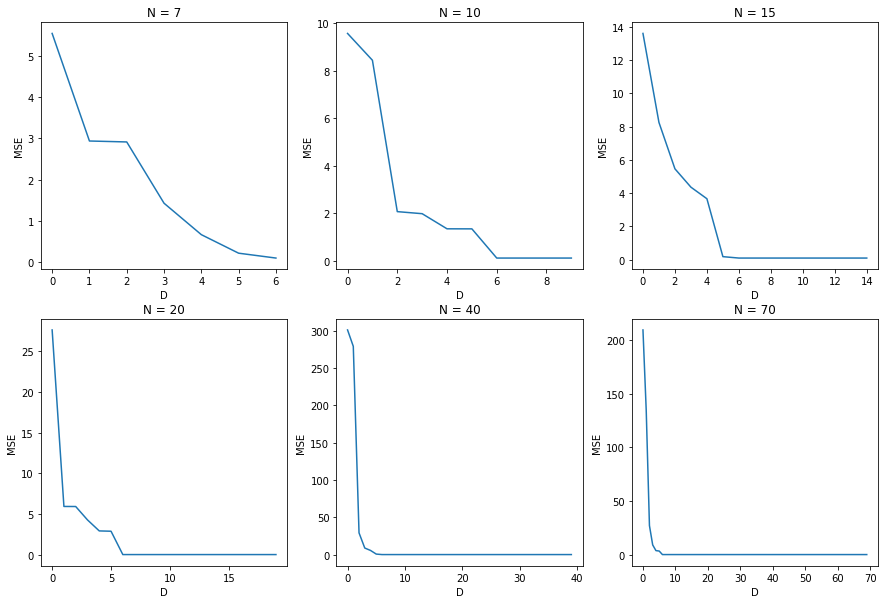

In [ ]:
# Standart regression

n, K, sigma = 1000, 7, (0.1)**0.5

fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i, N in enumerate([7, 10, 15, 20, 40, 70]):
    X = np.random.normal(0, 1, n * K).reshape((n, K))
    if N > K:
        dependencies = np.random.normal(0, 1, K * (N - K)).reshape((K, N - K))
        dependencies = np.concatenate([np.eye(K), dependencies], axis = 1)
        X = X @ dependencies
    X = np.random.permutation(X)

    beta = np.random.normal(0, 1, N + 1)
    eps = np.random.normal(0, sigma, n)

    Y = X @ beta[1:] + beta[0] + eps
    mrmr = MRMR(X, Y, "reg")
    quality = [get_scores_MSE(mrmr.top_k(k), Y) for k in range(1, N + 1)]
    ax[i // 3][i % 3].plot(quality)
    ax[i // 3][i % 3].set_title(f"N = {N}")
    ax[i // 3][i % 3].set_xlabel("D")
    ax[i // 3][i % 3].set_ylabel("MSE")
plt.show()
plt.imsave("std_reg.jpg")

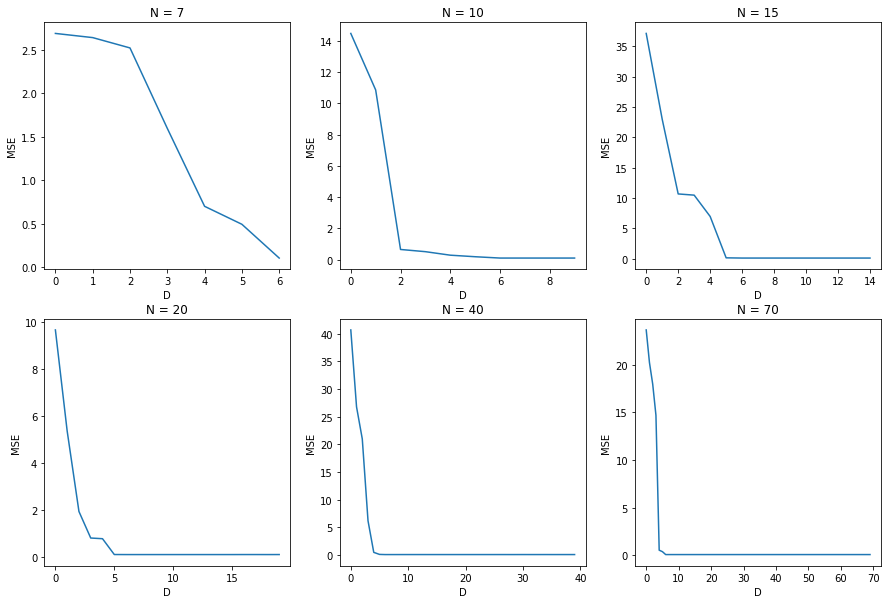

In [24]:
# Exponential regression

n, K, sigma = 1000, 7, (0.1)**0.5

fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i, N in enumerate([7, 10, 15, 20, 40, 70]):
    X = np.random.exponential(1, n * K).reshape((n, K))
    if N > K:
        dependencies = np.random.normal(0, 1, K * (N - K)).reshape((K, N - K))
        dependencies = np.concatenate([np.eye(K), dependencies], axis = 1)
        X = X @ dependencies
    X = np.random.permutation(X)

    beta = np.random.normal(0, 1, N + 1)
    eps = np.random.normal(0, sigma, n)

    Y = X @ beta[1:] + beta[0] + eps
    mrmr = MRMR(X, Y, "reg")
    quality = [get_scores_MSE(mrmr.top_k(k), Y) for k in range(1, N + 1)]
    ax[i // 3][i % 3].plot(quality)
    ax[i // 3][i % 3].set_title(f"N = {N}")
    ax[i // 3][i % 3].set_xlabel("D")
    ax[i // 3][i % 3].set_ylabel("MSE")
plt.show()


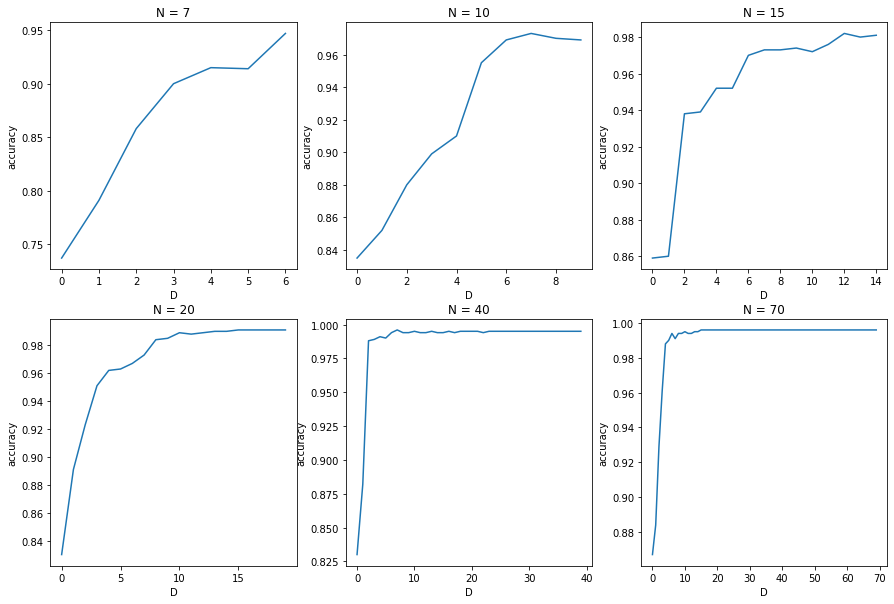

In [31]:
# Exponential classification

n, K, sigma = 1000, 7, (0.1)**0.5

fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i, N in enumerate([7, 10, 15, 20, 40, 70]):
    X = np.random.exponential(1, n * K).reshape((n, K))
    if N > K:
        dependencies = np.random.normal(0, 1, K * (N - K)).reshape((K, N - K))
        dependencies = np.concatenate([np.eye(K), dependencies], axis = 1)
        X = X @ dependencies
    X = np.random.permutation(X)

    beta = np.random.normal(0, 1, N + 1)
    eps = np.random.normal(0, sigma, n)

    Y = X @ beta[1:] + beta[0] + eps
    Y = (Y > Y.mean()).astype(int)
    mrmr = MRMR(X, Y, "cls")
    quality = [get_scores_accuracy(mrmr.top_k(k), Y) for k in range(1, N + 1)]
    ax[i // 3][i % 3].plot(quality)
    ax[i // 3][i % 3].set_title(f"N = {N}")
    ax[i // 3][i % 3].set_xlabel("D")
    ax[i // 3][i % 3].set_ylabel("accuracy")
plt.show()

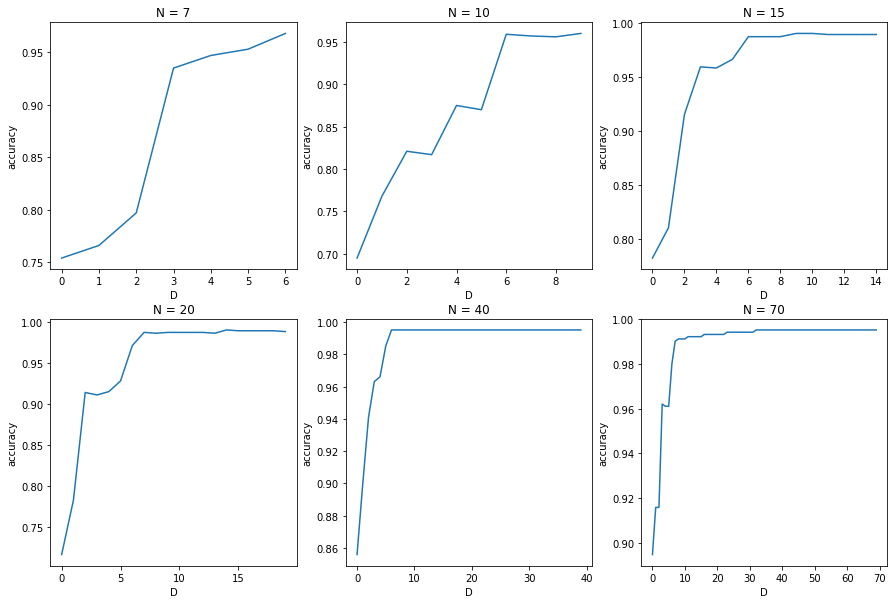

In [32]:
# Standart classification

n, K, sigma = 1000, 7, (0.1)**0.5

fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i, N in enumerate([7, 10, 15, 20, 40, 70]):
    X = np.random.normal(0, 1, n * K).reshape((n, K))
    if N > K:
        dependencies = np.random.normal(0, 1, K * (N - K)).reshape((K, N - K))
        dependencies = np.concatenate([np.eye(K), dependencies], axis = 1)
        X = X @ dependencies
    X = np.random.permutation(X)

    beta = np.random.normal(0, 1, N + 1)
    eps = np.random.normal(0, sigma, n)

    Y = X @ beta[1:] + beta[0] + eps
    Y = (Y > Y.mean()).astype(int)
    mrmr = MRMR(X, Y, "cls")
    quality = [get_scores_accuracy(mrmr.top_k(k), Y) for k in range(1, N + 1)]
    ax[i // 3][i % 3].plot(quality)
    ax[i // 3][i % 3].set_title(f"N = {N}")
    ax[i // 3][i % 3].set_xlabel("D")
    ax[i // 3][i % 3].set_ylabel("accuracy")
plt.show()